<a href="https://colab.research.google.com/github/Chuchu-Wan/ANNs-Real-World-Implementation-Neural-Networks-for-Predicting-Population-Mobility-in-Chinese-Cities/blob/main/Final_Project_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=bf408d912d4ec88eeb6ea0901fe8363226aedfe0bbd3caecfae8a30c6deab439
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/NNs/maindata_clean.dta'

data = pd.read_stata(file_path)

print(data.head())
print(data.info())

     year    Cityid  地区     地区生产总值万元   第一产业增加值万元    第二产业增加值万元     第三产业增加值万元  \
0  2009.0  110000.0  北京  121530000.0  1178841.00  28559550.00  9.179161e+07   
1  2010.0  110000.0  北京  141135800.0  1241995.04  33886705.58  1.060071e+08   
2  2011.0  110000.0  北京  162519300.0  1365162.12  37525706.37  1.236284e+08   
3  2012.0  110000.0  北京  178794000.0  1501869.60  40586238.00  1.367059e+08   
4  2013.0  110000.0  北京  195005600.0  1618546.48  43525249.92  1.498618e+08   

   第一产业增加值占GDP比重  第二产业增加值占GDP比重  第三产业增加值占GDP比重  ...  Population_density  \
0           0.97          23.50          75.53  ...              759.14   
1           0.88          24.01          75.11  ...              766.44   
2           0.84          23.09          76.07  ...              778.70   
3           0.84          22.70          76.46  ...              790.60   
4           0.83          22.32          76.85  ...              802.11   

   Popjuniorcollege  Popcollege  Human_capital_index  GDP_10000yuan  PM25 

In [ ]:
target = 'Population_mobility_rate'
features = [col for col in data.columns if col != target and col not in ['Cityid', '地区']]

X = data[features]
y = data[target]

In [ ]:
X = X.replace('', pd.NA)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=features)
X_test_df = pd.DataFrame(X_test, columns=features)

X_train_df = X_train_df.dropna(axis=1, how='all')
X_test_df = X_test_df.dropna(axis=1, how='all')

In [ ]:
non_numeric_cols = X_train_df.select_dtypes(exclude=['float64', 'int64']).columns
print(f"Non-numeric columns: {non_numeric_cols}")

X_train_df = X_train_df.select_dtypes(include=['float64', 'int64'])
X_test_df = X_test_df.select_dtypes(include=['float64', 'int64'])

X_train_df.fillna(X_train_df.mean(), inplace=True)
X_test_df.fillna(X_test_df.mean(), inplace=True)

print("NaN in X_train after filling:", X_train_df.isna().sum().sum())
print("NaN in X_test after filling:", X_test_df.isna().sum().sum())

Non-numeric columns: Index([], dtype='object')
NaN in X_train after filling: 0
NaN in X_test after filling: 0


In [ ]:
print(X_train_df.dtypes)
print("NaN in X_train:", X_train_df.isna().sum().sum())

year             float64
地区生产总值万元         float64
第一产业增加值万元        float64
第二产业增加值万元        float64
第三产业增加值万元        float64
                  ...   
GDP_10000yuan    float64
PM25             float64
ResidentsPop     float64
RegisteredPop    float64
Housing_price    float64
Length: 179, dtype: object
NaN in X_train: 0


In [ ]:
X_train_df.fillna(X_train_df.mean(), inplace=True)
X_test_df.fillna(X_test_df.mean(), inplace=True)

print("NaN in X_train after filling:", X_train_df.isna().sum().sum())
print("NaN in X_test after filling:", X_test_df.isna().sum().sum())

NaN in X_train after filling: 0
NaN in X_test after filling: 0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train = X_train_df.values
X_test = X_test_df.values

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import numpy as np

print("NaN in X_train:", np.isnan(X_train).sum())
print("Inf in X_train:", np.isinf(X_train).sum())
print("NaN in y_train:", np.isnan(y_train).sum())
print("Inf in y_train:", np.isinf(y_train).sum())

NaN in X_train: 0
Inf in X_train: 0
NaN in y_train: 676
Inf in y_train: 0


In [ ]:
print("Missing values in y_train:", y_train.isna().sum())
print("y_train summary before filling:")
print(y_train.describe())

Missing values in y_train: 676
y_train summary before filling:
count    2021.000000
mean        0.028500
std         0.400511
min        -0.397178
25%        -0.150901
50%        -0.075306
75%         0.053112
max         4.253374
Name: Population_mobility_rate, dtype: float64


In [ ]:
y_train.fillna(y_train.median(), inplace=True)

print("NaN in y_train after filling:", y_train.isna().sum())
print("y_train summary after filling:")
print(y_train.describe())

NaN in y_train after filling: 0
y_train summary after filling:
count    2697.000000
mean        0.002481
std         0.349589
min        -0.397178
25%        -0.122943
50%        -0.075306
75%        -0.014503
max         4.253374
Name: Population_mobility_rate, dtype: float64


In [ ]:
import numpy as np

print("NaN in X_train:", np.isnan(X_train).sum())
print("Inf in X_train:", np.isinf(X_train).sum())
print("NaN in y_train:", np.isnan(y_train).sum())
print("Inf in y_train:", np.isinf(y_train).sum())

NaN in X_train: 0
Inf in X_train: 0
NaN in y_train: 0
Inf in y_train: 0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          23,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,409 (130.50 KB)

 Trainable params: 33,409 (130.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1321 - mae: 0.1722 - val_loss: 0.0625 - val_mae: 0.0950
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0848 - mae: 0.1380 - val_loss: 0.0602 - val_mae: 0.1307
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0669 - mae: 0.1330 - val_loss: 0.0461 - val_mae: 0.0948
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0343 - mae: 0.1022 - val_loss: 0.0386 - val_mae: 0.0850
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0425 - mae: 0.1032 - val_loss: 0.0345 - val_mae: 0.0858
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0391 - mae: 0.0994 - val_loss: 0.0317 - val_mae: 0.0947
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0315 - mae: 0.0954 - val_loss: 0.0277 - val_mae: 0.0861
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0228 - mae: 0.0846 - val_loss: 0.0290 - val_mae: 0.0899
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0329 - mae:

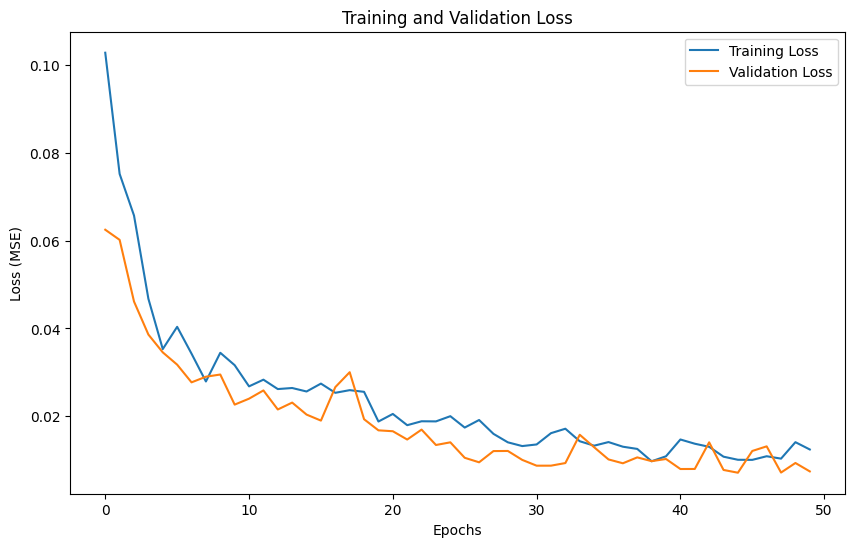

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

print("NaN in y_test:", np.isnan(y_test).sum())
print("NaN in y_pred:", np.isnan(y_pred).sum())

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
NaN in y_test: 181
NaN in y_pred: 0


In [ ]:
valid_indices = ~np.isnan(y_test)

y_test_cleaned = y_test[valid_indices]
y_pred_cleaned = y_pred[valid_indices]

print("NaN in y_test_cleaned:", np.isnan(y_test_cleaned).sum())
print("NaN in y_pred_cleaned:", np.isnan(y_pred_cleaned).sum())

NaN in y_test_cleaned: 0
NaN in y_pred_cleaned: 0


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_cleaned, y_pred_cleaned)
mae = mean_absolute_error(y_test_cleaned, y_pred_cleaned)

print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")

Test MSE: 0.013803674005208377
Test MAE: 0.06531298908464164


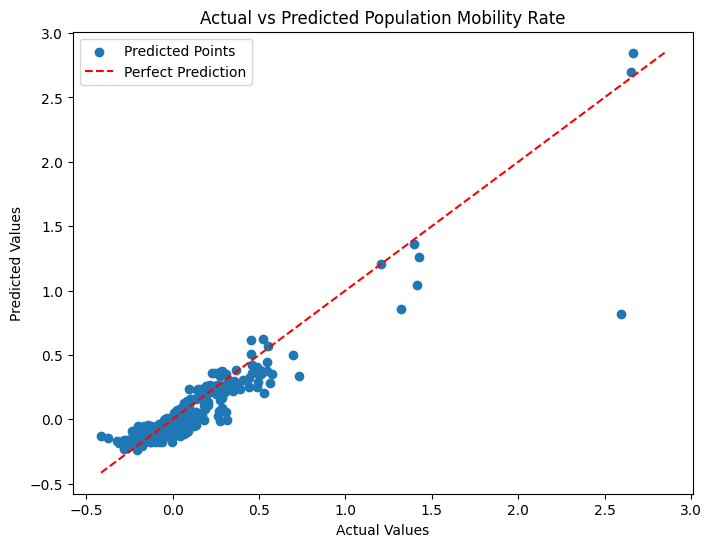

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, label='Predicted Points')

# Add a diagonal line
diagonal = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
plt.plot(diagonal, diagonal, color='red', linestyle='--', label='Perfect Prediction')

# Add labels, title, and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Population Mobility Rate')
plt.legend()

plt.show()

In [ ]:
model.save('/content/drive/My Drive/NNs/city_attractiveness_model.keras')

All for the model
here comes explaining